<a href="https://colab.research.google.com/github/rihemmaarefe/NLP-Tunisian-Dialect-sentimental-Analysis/blob/main/tnNLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyarabic

# **python libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving negative_comments.txt to negative_comments (2).txt
Saving positive_comments.txt to positive_comments (2).txt


In [ ]:
with open('/content/negative_comments.txt', 'r') as f:

    text=f.read()

vocab = sorted(set(text))

vocab_to_int = {c: i for i, c in enumerate(vocab)}

int_to_vocab = dict(enumerate(vocab))

encoded = np.array([vocab_to_int[c] for c in text], dtype=np.int32)

In [ ]:
with open('/content/positive_comments.txt', 'r') as f1:

    text1=f1.read()

vocab = sorted(set(text1))

vocab_to_int = {c: i for i, c in enumerate(vocab)}

int_to_vocab = dict(enumerate(vocab))

encoded = np.array([vocab_to_int[c] for c in text1], dtype=np.int32)

In [ ]:
def parse_my_file(filename):
    with open(filename) as f:
        for line in f:
            yield line.strip().split('\n', 1)

**Positive Comments Dataset**

In [ ]:
positiveDf = pd.DataFrame(parse_my_file('/content/positive_comments.txt'))
#positiveDf.shape

In [ ]:
positiveDf = positiveDf.rename(columns={0:'texts'})
positiveDf.columns = ['texts']

In [ ]:
positiveDfTest = positiveDf
positiveDfTest

,texts
0,yar777em weldin weldikk bravooooo
1,Bravo amine...j'aime
2,صراحة bravo أحمد الرحموني .
3,Souut w ziiin lee wlh bch tda5llouna f 7iiit
4,ANAA N7bha
...,...
36781,الله يستر ن
36782,الله يستر ن
36783,ربي اكون فى عونكم بالحق ربي ابقي الستر على تون...
36784,


**Negative Comments Dataset**

In [ ]:
negativeDf = pd.DataFrame(parse_my_file('/content/negative_comments.txt'))
#negativeDf.shape

In [ ]:
negativeDf = negativeDf.rename(columns={0:'texts'})
negativeDf.columns = ['texts']

In [ ]:
negativeDftest = negativeDf
negativeDftest

,texts
0,
1,Nn mouch 7louwa faza
2,mabladkom 3bed tfouuuuh
3,تفووووووه عليك و علا والديك على عايلتك و على ا...
4,لا يليق بهذا البرنامج
...,...
13100,علم موقع نسمة، أن باخرة إيطالية، وصلت في ساعة ...
13101,رجع الهم، زايد بلاد بلا راجل، موش سكرتو الحدود...
13102,"""نداء الى رئيس الجمهورية:"
13103,هبط الجيش واقفل الحدود وأعلن الحالة القصوى وكل...


**label datasets**

In [ ]:
label = [] 
for row in positiveDf['texts'] :
  label.append('pos') 
    
        
positiveDf['label'] = label
positiveDf

,texts,label
0,yar777em weldin weldikk bravooooo,pos
1,Bravo amine...j'aime,pos
2,صراحة bravo أحمد الرحموني .,pos
3,Souut w ziiin lee wlh bch tda5llouna f 7iiit,pos
4,ANAA N7bha,pos
...,...,...
36781,الله يستر ن,pos
36782,الله يستر ن,pos
36783,ربي اكون فى عونكم بالحق ربي ابقي الستر على تون...,pos
36784,,pos


In [ ]:
label = [] 
for row in negativeDf['texts'] :
  label.append('neg') 
    
        
negativeDf['label'] = label
negativeDf

,texts,label
0,,neg
1,Nn mouch 7louwa faza,neg
2,mabladkom 3bed tfouuuuh,neg
3,تفووووووه عليك و علا والديك على عايلتك و على ا...,neg
4,لا يليق بهذا البرنامج,neg
...,...,...
13100,علم موقع نسمة، أن باخرة إيطالية، وصلت في ساعة ...,neg
13101,رجع الهم، زايد بلاد بلا راجل، موش سكرتو الحدود...,neg
13102,"""نداء الى رئيس الجمهورية:",neg
13103,هبط الجيش واقفل الحدود وأعلن الحالة القصوى وكل...,neg


**Combine datasets**

In [ ]:
completeData = pd.concat([positiveDf,negativeDf], ignore_index=True)
completeData

,texts,label
0,yar777em weldin weldikk bravooooo,pos
1,Bravo amine...j'aime,pos
2,صراحة bravo أحمد الرحموني .,pos
3,Souut w ziiin lee wlh bch tda5llouna f 7iiit,pos
4,ANAA N7bha,pos
...,...,...
49886,علم موقع نسمة، أن باخرة إيطالية، وصلت في ساعة ...,neg
49887,رجع الهم، زايد بلاد بلا راجل، موش سكرتو الحدود...,neg
49888,"""نداء الى رئيس الجمهورية:",neg
49889,هبط الجيش واقفل الحدود وأعلن الحالة القصوى وكل...,neg


# Analysis on datasets

In [ ]:
print(len(positiveDf))

36786


In [ ]:
print(len(negativeDf))

13105


In [ ]:
completeData['label'].value_counts()

pos    36786
neg    13105
Name: label, dtype: int64

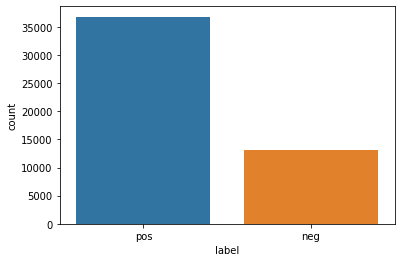

In [ ]:
sns.countplot(data= completeData, x = "label")
plt.show()

In [ ]:
completeData['texts'].head(10)

0                    yar777em weldin weldikk bravooooo
1                                 Bravo amine...j'aime
2                          صراحة bravo أحمد الرحموني .
3         Souut w ziiin lee wlh bch tda5llouna f 7iiit
4                                           ANAA N7bha
5                                      Bravooooo walid
6                                    محترم و نموة علها
7             ربي يشفيلك بوك،وان شاء الله غصرة وتتعدى،
8    Bravoooooooooooooooo w5ali nabara 3la jnab rak...
9                                                Bravo
Name: texts, dtype: object

**Null values**

In [ ]:
np.sum(completeData.isnull().any(axis=1))

0

In [ ]:
completeData.isnull().any(axis=0)

texts    False
label    False
dtype: bool

# Data Pre-processing

In [ ]:
for letter in '@#.][!XR':
    completeData['texts'] = completeData['texts'].astype(str).str.replace(letter,'')

In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

**Normalization**

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

**Remove Repetited characters**

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

**apply all functions**

In [ ]:
def processPost(comment): 

    #Replace @username with empty string
    comment = re.sub('@[^\s]+', ' ', comment)
    
    #Convert www.* or https?://* to " "
    comment = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',comment)
    
    #Replace #word with word
    comment = re.sub(r'#([^\s]+)', r'\1', comment)

    # remove punctuations
    comment= remove_punctuations(comment)
    
    # normalize the comment
     #comment= normalize_arabic(comment)
    
    # remove repeated letters
    comment=remove_repeating_char(comment)
    
    return comment

In [ ]:
completeData["texts"] = completeData['texts'].apply(lambda x: processPost(x)) # apply used to call the method processpost

**Remove duplications**

In [ ]:
completeData.duplicated().sum()
completeData[completeData.duplicated()]

,texts,label
58,Bravo,pos
76,Bravo,pos
84,Bravo,pos
102,Bravo,pos
147,Tayara,pos
...,...,...
49886,علم موقع نسمة أن باخرة إيطالية وصلت في ساعة مت...,neg
49887,رجع الهم زايد بلاد بلا راجل موش سكرتو الحدود ا...,neg
49888,نداء الى رئيس الجمهورية,neg
49889,هبط الجيش واقفل الحدود وأعلن الحالة القصوى وكل...,neg


In [ ]:
#removing
completeData.drop_duplicates(inplace=True)

#checking if still contain duplications
completeData.duplicated().sum()

0

**Tokenize the comments text**

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
completeData["texts"] = completeData["texts"].apply(tokenizer.tokenize)

In [ ]:
completeData["texts"].head(10)

0                      [yar7em, weldin, weldik, bravo]
1                                  [Bravo, aminejaime]
2                       [صراحة, bravo, أحمد, الرحموني]
3      [Sout, w, zin, le, wlh, bch, tda5louna, f, 7it]
4                                         [ANA, N7bha]
5                                       [Bravo, walid]
6                               [محترم, و, نموة, علها]
7         [ربي, يشفيلك, بوكوان, شاء, اله, غصرة, وتعدى]
8    [Bravo, w5ali, nabara, 3la, jnab, rak, wa7dik,...
9                                              [Bravo]
Name: texts, dtype: object

**Remove Stop words (ARABIC/ENGLISH/FRENCH)**

In [ ]:
import nltk
nltk.download('stopwords')
stopwords_listArabic = stopwords.words('arabic') 
stopwords_listArabic

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [ ]:
# print(len(stopwords_listArabic))

In [ ]:
stopwords_listEnglish = stopwords.words('english')
stopwords_listEnglish 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords_listFrench = stopwords.words('french')
stopwords_listFrench 

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [ ]:
completeData["texts"]=completeData["texts"].apply(lambda x: [item for item in x if item not in stopwords_listArabic])

In [ ]:
completeData["texts"]=completeData["texts"].apply(lambda x: [item for item in x if item not in stopwords_listFrench])

In [ ]:
completeData["texts"]=completeData["texts"].apply(lambda x: [item for item in x if item not in stopwords_listEnglish])

**Comment text information**

In [ ]:
all_words = [word for tokens in completeData["texts"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in completeData["texts"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

199980 words total, with a vocabulary size of 55365
Max sentence length is 251


**top 10 words**

In [ ]:
counter = Counter(all_words)
counter.most_common(10)

[('اله', 2402),
 ('ربي', 2285),
 ('w', 1475),
 ('الي', 1234),
 ('تونس', 1056),
 ('ya', 848),
 ('باش', 668),
 ('bravo', 650),
 ('fi', 541),
 ('الوزير', 536)]

In [ ]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

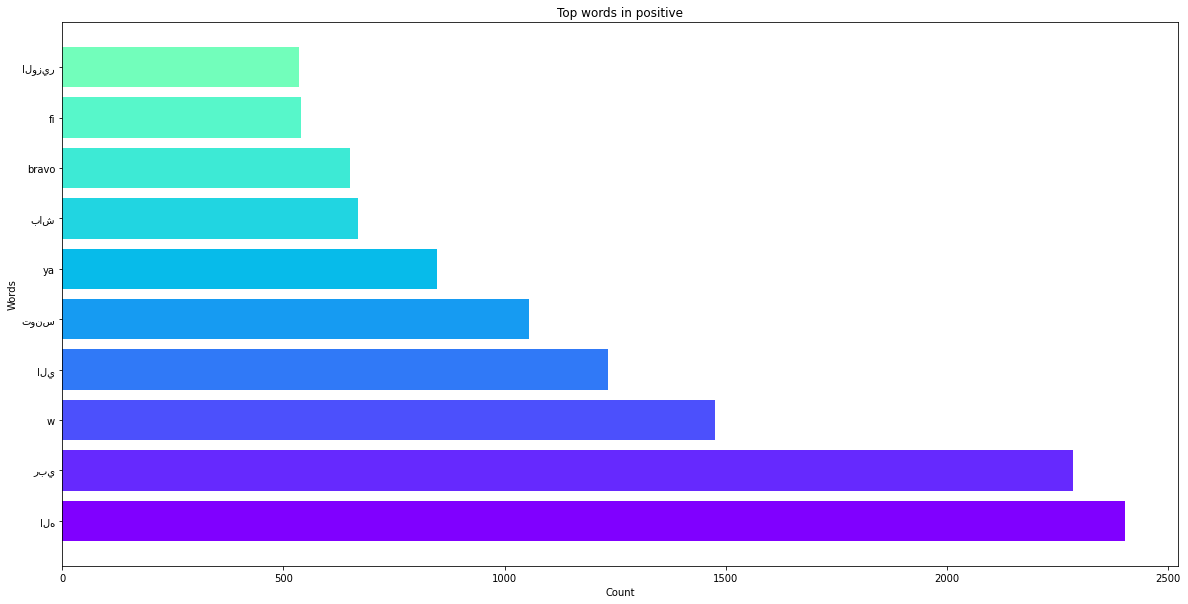

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Data Preparation for training

**Features Extraction from *comments* text with TFIDF unigram**

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

unigramdataGet= word_vectorizer.fit_transform(completeData['texts'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1

unigramdata_features.head()

,10,12,14,15,150,16,160,17,18,180,...,يوما,يومنا,يومه,يومي,يوميا,يومين,ڨارة,ڨمرة,کان,یا
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**encoding class as 1 for Postive class and 0 for negative class**

In [ ]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(completeData['label'])
completeData['label'] = encpro

**By getting features and Class**

In [ ]:
y=completeData['label']
X=unigramdata_features

**Spliting Dataset into 70% Training and 30% Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=333)

# ------> Train using Machine Learning Algorithms

# **Naive Bayes Algorithm**

In [ ]:
NaiveBase=GaussianNB()
NaiveBase= NaiveBase.fit(X_train , y_train)
NaiveBase

GaussianNB()

**Naive base Accuracy**

In [ ]:
y_pred = NaiveBase.predict(X_test)
NaiveBase1 =NaiveBase.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(NaiveBase.score(X_test, y_test)))

Accuracy= 0.802


**Naive bae Precision**

In [ ]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.85 %


# **LogisticRegression Algorithm**

In [ ]:
LogisticRegressionM= LogisticRegression(penalty = 'l2', C = 1)
LogisticRegressionM= LogisticRegressionM.fit(X_train , y_train)
LogisticRegressionM

LogisticRegression(C=1)

**Logistic Regression Accuracy**

In [ ]:
y_pred = LogisticRegressionM.predict(X_test)
LogisticRegressionM1=LogisticRegressionM.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LogisticRegressionM.score(X_test, y_test)))

Accuracy= 0.829


**Logistic Regression Precision**

In [ ]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.87 %


# **SVM**

In [ ]:
from sklearn.svm import SVC
SVCModel = SVC(kernel= 'poly',max_iter=100,C=1.0,gamma='auto')# it can be also linear,poly,sigmoid,precomputed
SVCModel.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly', max_iter=100)

**Accuracy of SVM**

In [ ]:
y_pred = SVCModel.predict(X_test)
svm =SVCModel.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(SVCModel.score(X_test, y_test)))

Accuracy= 0.619


# **MLPC**

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='relu', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,max_iter=200,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=99)
MLPClassifierModel.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 3), random_state=99, solver='lbfgs')

**MPLC Accuracy**

In [ ]:
y_pred = MLPClassifierModel.predict(X_test)
nn =MLPClassifierModel.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(MLPClassifierModel.score(X_test, y_test)))

Accuracy= 0.815


# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

**Random Forest Accuracy**

In [ ]:
y_pred = clf.predict(X_test)
RF =clf.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy= 0.812


# ***Conclusion***

The best Algorithm to work with is Linear regression with an accuracy of 87%

# ***Prediction***

In [ ]:
# testText = ['woooooh ma5yebhaa lfaza ']
testText = ['heyla']

In [ ]:
x = word_vectorizer.transform(testText)

In [ ]:
pred=LogisticRegressionM.predict(x)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (prediction)

  Prediction
0        pos


**Create new dataset showing prediction with the text**

In [ ]:
result=pd.DataFrame()
result['Text'] = testText
result['Prediction'] = prediction
result

,Text,Prediction
0,heyla,pos
